In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from decimal import Decimal

# Study data files
cleaned_data_path = "Data/data_cleaning.csv"
stacked_data_path = "Data/data_cleaning_stacked.csv"

# Read the mouse data and the study results
movie_clean = pd.read_csv(cleaned_data_path, index_col=0)
movie_stacked = pd.read_csv(stacked_data_path, index_col=0)

pd.options.display.float_format = '{:,.1f}'.format

In [2]:
# Bin data by decade
decade_bins = [1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
decade_names = ['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']

### Cleaned Data

In [3]:
# Display the data table for cleaned data
movie_clean.head()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,"Drama, Romance, War",150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$128,831,540.56"
1,tt0017136,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$17,839,651.48"
2,tt0017354,The Sea Beast,1926,1926-01-15,"Action, Adventure, Fantasy",136,USA,English,Millard Webb,"Herman Melville, Bess Meredyth",Warner Bros.,"John Barrymore, Dolores Costello, George O'Har...",6.5,126,"$814,000.00","$11,548,084.63"
3,tt0021749,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Virginia Cherrill, Florence Lee, Harry Myers, ...",8.5,152716,"$19,181.00","$316,873.91"
4,tt0027977,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Charles Chaplin, Paulette Goddard, Henry Bergm...",8.5,197969,"$163,577.00","$2,955,059.69"


### Stacked Data Analysis

In [4]:
# Remove leading space in genre
movie_stacked['Genre'] = movie_stacked['Genre'].str.lstrip()



# Display the data table for stacked data
movie_stacked.head()

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
0,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Drama,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
1,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,Romance,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
2,tt0012190,The Four Horsemen of the Apocalypse,1921,1923-01-08,War,150,USA,None,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,2935,"$9,183,673.00","$131,165,937.89"
3,tt0017136,Metropolis,1927,1927-02-06,Drama,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$18,162,901.79"
4,tt0017136,Metropolis,1927,1927-02-06,Sci-Fi,153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),"Alfred Abel, Gustav Fröhlich, Rudolf Klein-Rog...",8.3,148396,"$1,236,166.00","$18,162,901.79"


In [5]:
# Cut stacked data by decade
movie_stacked["Decade"] = pd.cut(movie_stacked["Year"], decade_bins, labels=decade_names, include_lowest=True)
movie_stacked.head()

# Output file to csv
movie_stacked.to_csv(r'Data\movie_stacked_nc.csv', index=False)

In [6]:
# Group stacked data by decade and count how many records
stacked_decade = movie_stacked.groupby('Decade')
stacked_decade.count()


,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($)
Decade,,,,,,,,,,,,,,,,
1920-1929,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1930-1939,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1940-1949,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
1950-1959,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
1960-1969,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1970-1979,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572,572
1980-1989,3108,3108,3108,3108,3108,3108,3108,3108,3108,3108,3085,3108,3108,3108,3108,3108
1990-1999,4374,4374,4374,4374,4374,4374,4374,4371,4374,4372,4363,4374,4374,4374,4374,4374
2000-2009,5459,5459,5459,5459,5459,5459,5459,5447,5457,5449,5402,5457,5459,5459,5459,5459


In [7]:
# Create a variable for each decade with more than 500 records
decade_70 = (movie_stacked[movie_stacked['Decade'] == '1970-1979']).reset_index(drop=True)
decade_80 = (movie_stacked[movie_stacked['Decade'] == '1980-1989']).reset_index(drop=True)
decade_90 = (movie_stacked[movie_stacked['Decade'] == '1990-1999']).reset_index(drop=True)
decade_00 = (movie_stacked[movie_stacked['Decade'] == '2000-2009']).reset_index(drop=True)
decade_10 = (movie_stacked[movie_stacked['Decade'] == '2010-2019']).reset_index(drop=True)

## Create DataFrame and Bar Chart for Each Decade

### 1970's

In [8]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_70_groupby = decade_70.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_70_df = pd.DataFrame(decade_70_groupby)
decade_70_df['%'] = ((decade_70_df['Decade'] / decade_70_df['Decade'].sum())*100).round(1).astype(float)


decade_70_df.reset_index()

,Genre,Decade,%
0,Drama,137,24.0
1,Comedy,87,15.2
2,Action,41,7.2
3,Romance,40,7.0
4,Adventure,39,6.8
5,Crime,38,6.6
6,Thriller,38,6.6
7,Mystery,21,3.7
8,Sci-Fi,19,3.3
9,Sport,17,3.0


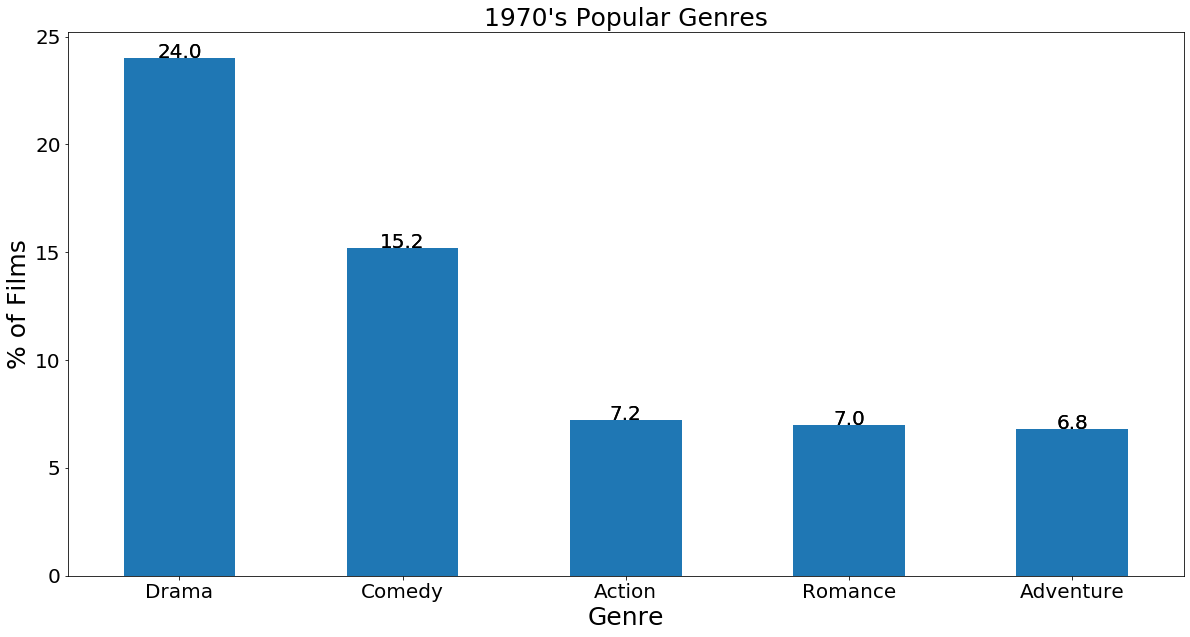

In [9]:
# Plot bar chart
ax = decade_70_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_70_df.columns:
    for id, val in enumerate(decade_70_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1970's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1980's

In [10]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_80_groupby = decade_80.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_80_df = pd.DataFrame(decade_80_groupby)
decade_80_df['%'] = ((decade_80_df['Decade'] / decade_80_df['Decade'].sum())*100).round(1).astype(float)


decade_80_df.reset_index()

,Genre,Decade,%
0,Drama,654,21.0
1,Comedy,576,18.5
2,Action,274,8.8
3,Crime,253,8.1
4,Romance,245,7.9
5,Adventure,178,5.7
6,Thriller,174,5.6
7,Horror,146,4.7
8,Fantasy,99,3.2
9,Mystery,90,2.9


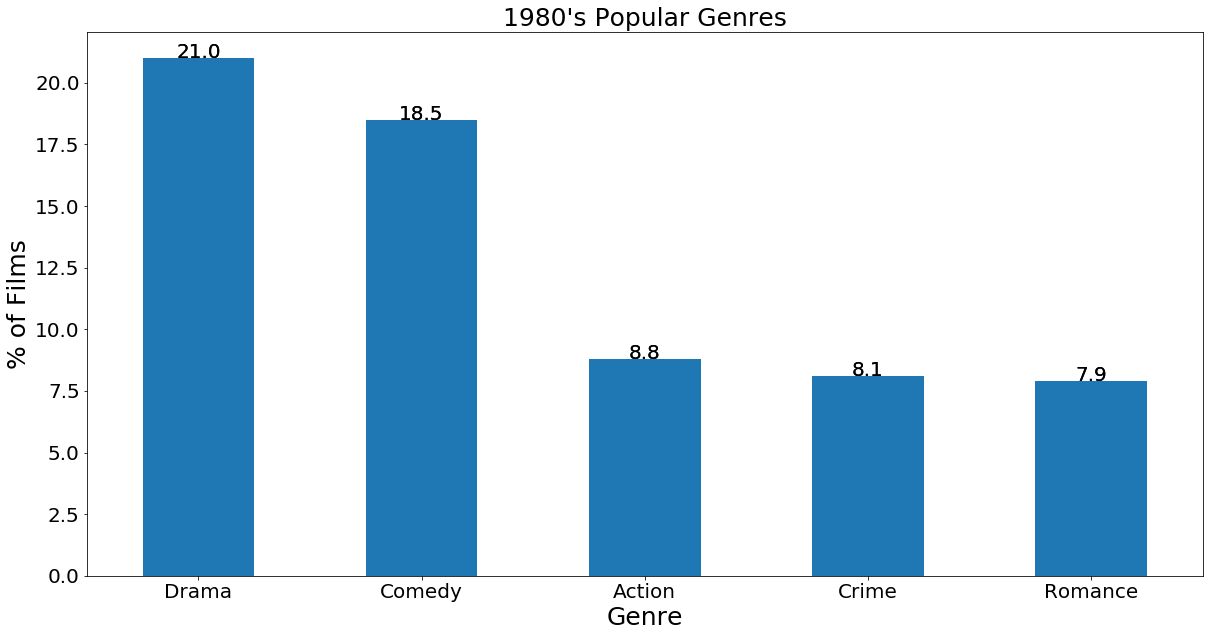

In [11]:
# Plot bar chart
ax = decade_80_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_80_df.columns:
    for id, val in enumerate(decade_80_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1980's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 1990's

In [12]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_90_groupby = decade_90.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_90_df = pd.DataFrame(decade_90_groupby)
decade_90_df['%'] = ((decade_90_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_90_df.reset_index()

,Genre,Decade,%
0,Drama,1043,23.8
1,Comedy,832,19.0
2,Romance,385,8.8
3,Crime,383,8.8
4,Action,340,7.8
5,Thriller,262,6.0
6,Adventure,223,5.1
7,Family,144,3.3
8,Mystery,119,2.7
9,Horror,113,2.6


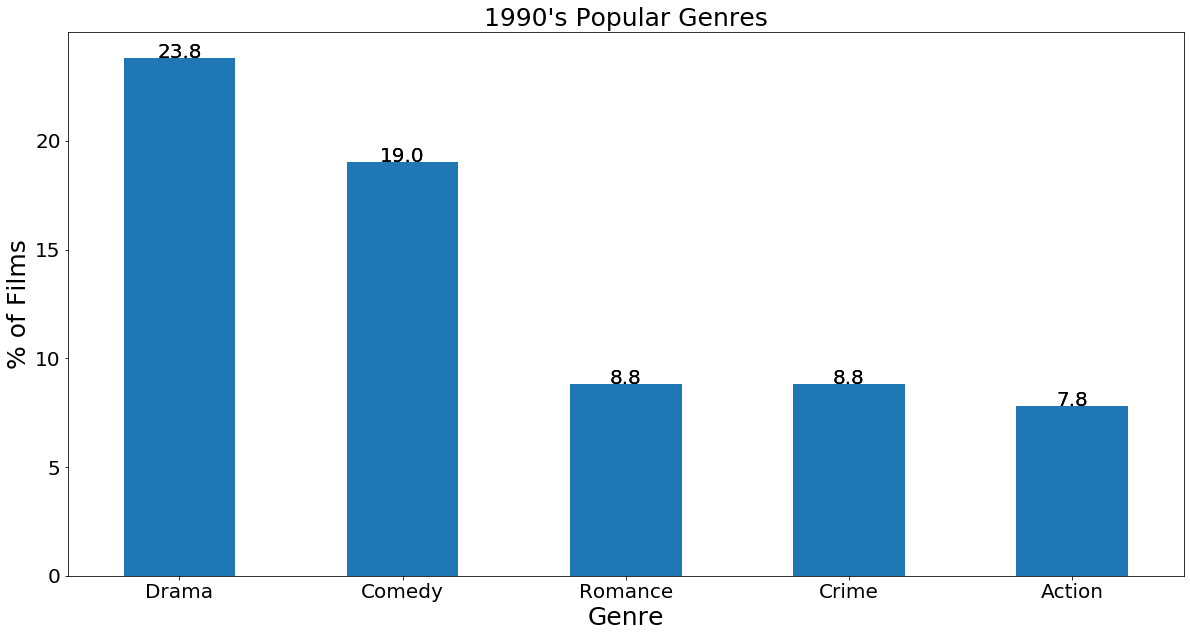

In [13]:
# Plot bar chart
ax = decade_90_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_90_df.columns:
    for id, val in enumerate(decade_90_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("1990's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2000's

In [14]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_00_groupby = decade_00.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_00_df = pd.DataFrame(decade_00_groupby)
decade_00_df['%'] = ((decade_00_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_00_df.reset_index()

,Genre,Decade,%
0,Drama,1230,28.1
1,Comedy,972,22.2
2,Romance,518,11.8
3,Action,439,10.0
4,Crime,416,9.5
5,Adventure,326,7.5
6,Thriller,284,6.5
7,Mystery,196,4.5
8,Family,163,3.7
9,Horror,159,3.6


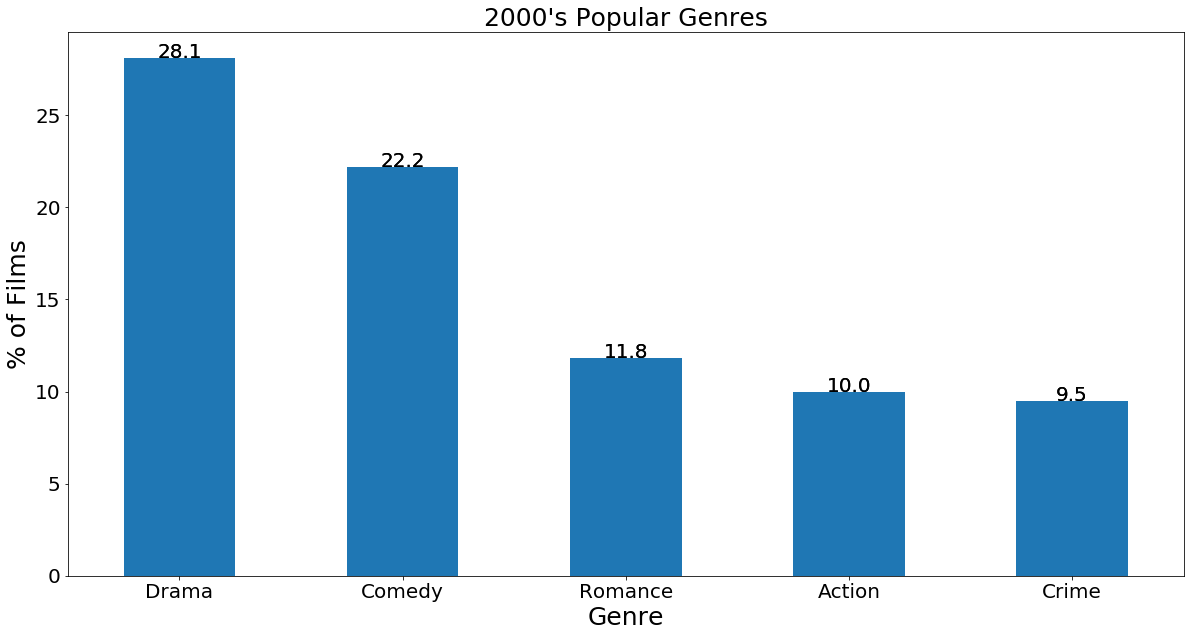

In [15]:
# Plot bar chart
ax = decade_00_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_00_df.columns:
    for id, val in enumerate(decade_00_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2000's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### 2010's

In [16]:
# Create DataFrame for each decade
# stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
decade_10_groupby = decade_10.groupby('Genre').count()['Decade'].sort_values(ascending=False)
decade_10_df = pd.DataFrame(decade_10_groupby)
decade_10_df['%'] = ((decade_10_df['Decade'] / decade_90_df['Decade'].sum())*100).round(1).astype(float)


decade_10_df.reset_index()

,Genre,Decade,%
0,Drama,1178,26.9
1,Comedy,803,18.4
2,Action,521,11.9
3,Romance,350,8.0
4,Thriller,344,7.9
5,Adventure,326,7.5
6,Crime,296,6.8
7,Horror,200,4.6
8,Biography,193,4.4
9,Mystery,155,3.5


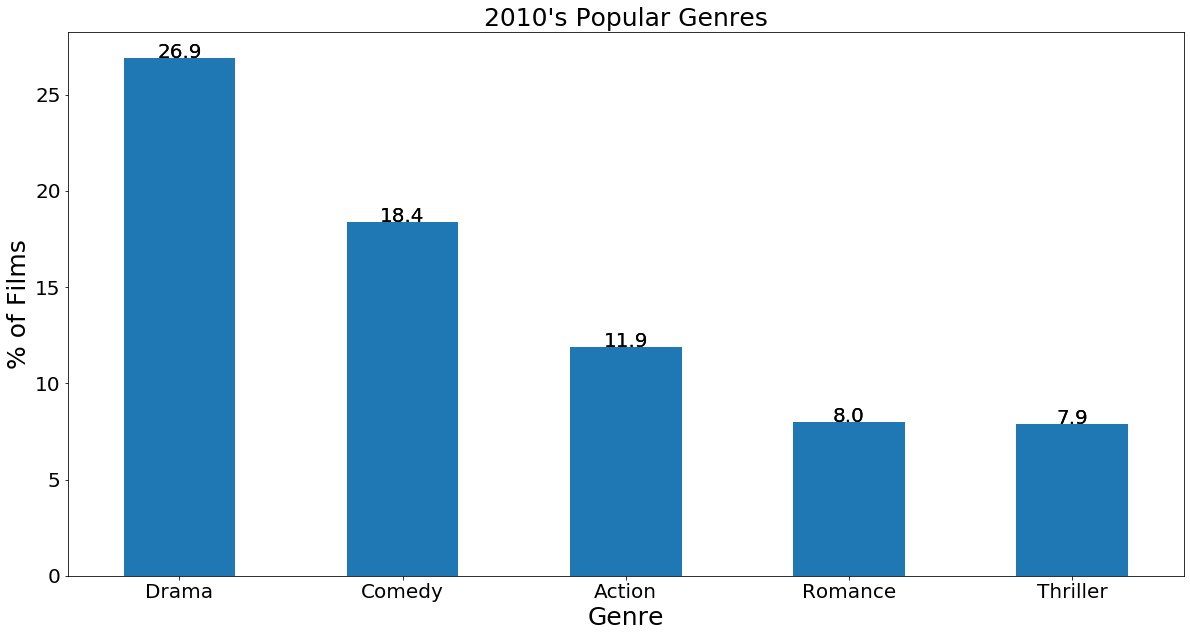

In [17]:
# Plot bar chart
ax = decade_10_df.iloc[0:5].plot(y='%', kind="bar", figsize=(20,10), rot=0, legend=False, fontsize = 20)

# Create and format value labels
for col in decade_10_df.columns:
    for id, val in enumerate(decade_10_df['%'].iloc[0:5]):
        ax.text(id, val, float(val), fontsize=20, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("2010's Popular Genres", fontsize=25)
plt.xlabel("Genre", fontsize=25)
plt.ylabel("% of Films", fontsize=25)


plt.show()

### Financial Data by Genre

In [41]:
# Create one DataFrame with data from 1970-2019
narrowed_genre = (movie_stacked[(movie_stacked['Decade'] == '1970-1979') | (movie_stacked['Decade'] == '1980-1989')
                                     | (movie_stacked['Decade'] == '1990-1999') | (movie_stacked['Decade'] == '1990-1999')
                                     | (movie_stacked['Decade'] == '2000-2009') | (movie_stacked['Decade'] == '2010-2019')])

# Save output
narrowed_genre.to_csv(r'Data\narrowed_genre_nc.csv', index=False)

# Make copy of dataframe
narrowed_genre_2 = narrowed_genre.copy()

# Strip the currency sign from Adjusted Gross and make a float variable
narrowed_genre_2['Lifetime Gross - Adjusted ($)']=(narrowed_genre_2['Lifetime Gross - Adjusted ($)'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))


# Display Dataframe
narrowed_genre_2

,IMDB ID,Title,Year,Date Published,Genre,Duration,Country,Language,Director,Writer,Production Company,Actors,Avg Rating,# of Ratings,Lifetime_Gross,Lifetime Gross - Adjusted ($),Decade
184,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,Adventure,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.0,21903,"$5,050,000.00","33,274,944.6",1970-1979
185,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,Romance,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.0,21903,"$5,050,000.00","33,274,944.6",1970-1979
186,tt0065134,Two Mules for Sister Sara,1970,1971-03-26,War,116,"Mexico, USA","English, Spanish, French, Latin",Don Siegel,"Budd Boetticher, Albert Maltz",The Malpaso Company,"Shirley MacLaine, Clint Eastwood, Manolo Fábre...",7.0,21903,"$5,050,000.00","33,274,944.6",1970-1979
190,tt0065377,Airport,1970,1970-07-31,Action,137,USA,"English, Italian","George Seaton, Henry Hathaway","Arthur Hailey, George Seaton",Universal Pictures,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",6.6,16269,"$100,489,151.00","662,132,857.7",1970-1979
191,tt0065377,Airport,1970,1970-07-31,Drama,137,USA,"English, Italian","George Seaton, Henry Hathaway","Arthur Hailey, George Seaton",Universal Pictures,"Burt Lancaster, Dean Martin, Jean Seberg, Jacq...",6.6,16269,"$100,489,151.00","662,132,857.7",1970-1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18750,tt8427036,Helicopter Eela,2018,2018-10-12,Drama,135,India,Hindi,Pradeep Sarkar,"Mitesh Shah, Anand Gandhi",Ajay Devgn Ffilms,"Kajol, Riddhi Sen, Tota Roy Chowdhury, Neha Dh...",5.5,800,"$71,971.00","73,275.1",2010-2019
18751,tt8581198,Jane and Emma,2018,2018-10-12,Drama,90,USA,English,Chantelle Squires,Melissa Leilani Larson,NaN,"Danielle Deadwyler, Emily Goss, Brad Schmidt, ...",5.9,115,"$380,030.00","386,916.0",2010-2019
18752,tt8925540,Racetime,2018,2018-12-14,Animation,89,Canada,English,"Benoît Godbout, Jean-François Pouliot","Claude Landry, Maxime Landry",CarpeDiem Film & TV,"Sonja Ball, Hélène Bourgeois Leclerc, Mehdi Bo...",5.4,227,"$1,875,283.00","1,909,262.7",2010-2019
18753,tt8925540,Racetime,2018,2018-12-14,Adventure,89,Canada,English,"Benoît Godbout, Jean-François Pouliot","Claude Landry, Maxime Landry",CarpeDiem Film & TV,"Sonja Ball, Hélène Bourgeois Leclerc, Mehdi Bo...",5.4,227,"$1,875,283.00","1,909,262.7",2010-2019


In [50]:
# Group data by Decade & Genre
narrowed_data_groupby = narrowed_genre.groupby(['Decade','Genre']).mean()


narrowed_data_df = pd.DataFrame(narrowed_data_groupby)



narrowed_data_df.dropna(how="any", inplace=False)


Year  Duration  Avg Rating  # of Ratings
Decade    Genre                                                
1970-1979 Action    1,975.5     110.4         6.5      64,313.8
          Adventure 1,976.2     113.2         6.5      71,482.3
          Animation 1,977.0      94.0         6.9      25,811.3
          Biography 1,975.2     133.2         7.6      89,820.3
          Comedy    1,976.9     105.3         6.5      24,376.0
...                     ...       ...         ...           ...
2010-2019 Sci-Fi    2,014.2     113.7         6.3     252,275.6
          Sport     2,014.1     115.5         6.6      50,796.6
          Thriller  2,014.0     105.9         5.9      95,086.0
          War       2,014.8     118.2         6.0      26,742.8
          Western   2,013.5     108.1         6.5     126,283.4

[100 rows x 4 columns]